**Importing Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

**Load custom `training` and `testing` datasets from *CIFAR-10***

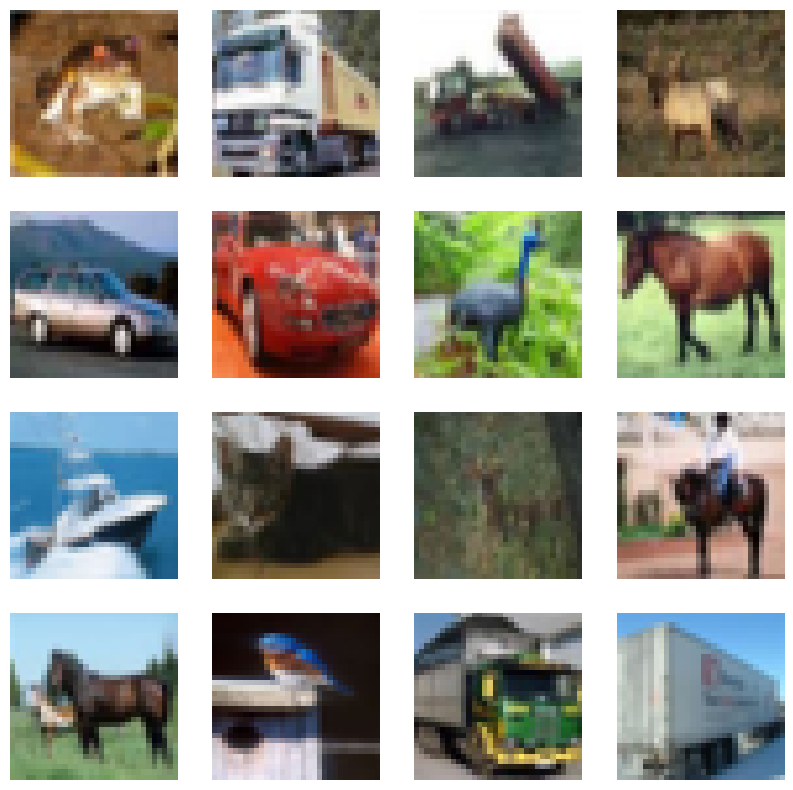

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values for image augmentation
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Display the sample data
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

**Create a sample image**

In [3]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new(mode='RGB', size=(224, 224), color=(255, 255, 255))    # Create a white image of 224x224 pixel size

# Creates a drawing platform for drawing shape, lines
draw = ImageDraw.Draw(image)

# Plot rectangle in the image
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Save the image
image.save('sample.jpg')

**Load image back for image augmentation**

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [5]:
path = 'sample.jpg'
image = load_img(path)
x = img_to_array(image)
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

**Applying basic image data augmentation**

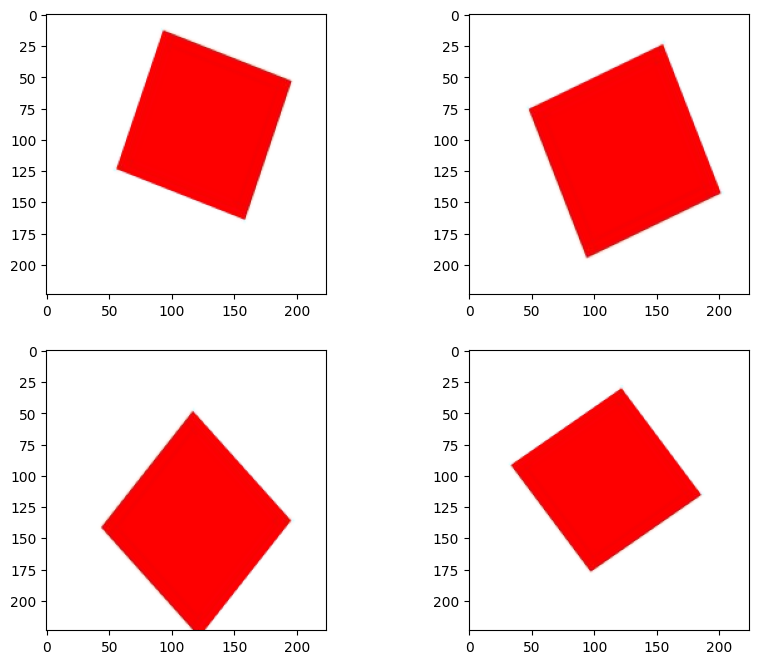

In [6]:
datagen = ImageDataGenerator(rotation_range=90, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, fill_mode='nearest', horizontal_flip=True, shear_range=0.2)

# Generate batches of augmented image
plt.figure(figsize=(10, 8))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.subplot(2, 2, i+1)
    img_plot = plt.imshow(batch[0].astype('uint8'))
    i+=1
    if i%4==0:
        break
plt.show()

**Feature wise sample normalization**

/Users/nareshdhami/Desktop/Visual Code/.venv/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/Users/nareshdhami/Desktop/Visual Code/.venv/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1872: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


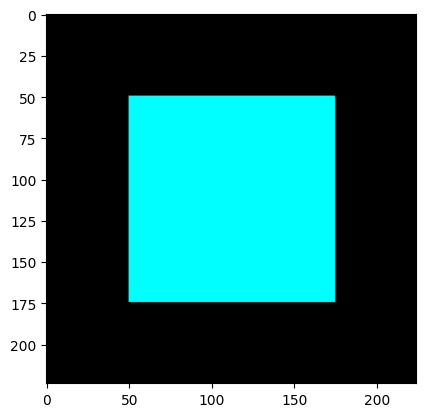

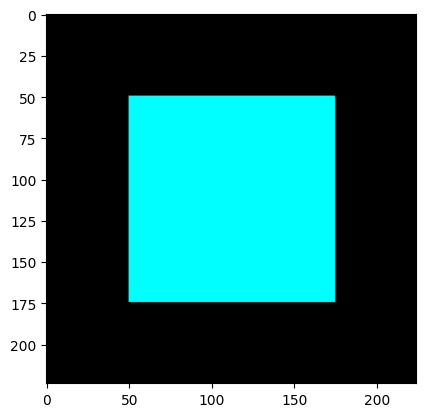

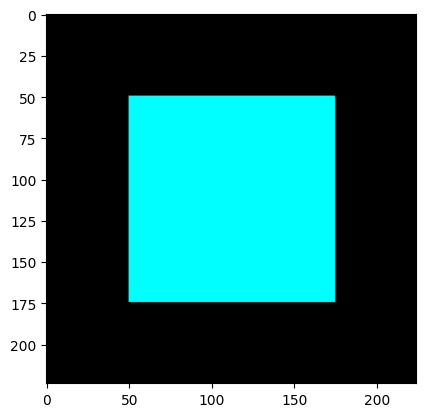

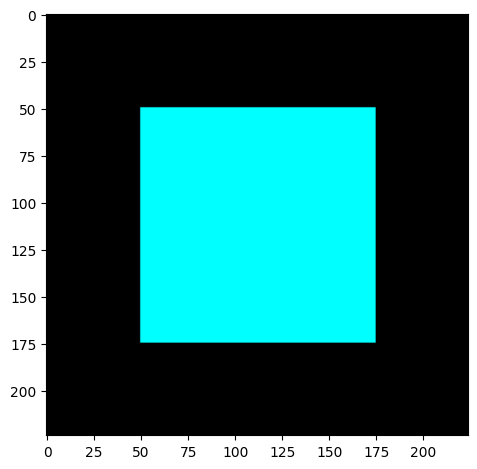

In [7]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, samplewise_center=True, samplewise_std_normalization=True)

# Load the sample image again and fit the generator
image = load_img(path)
x = img_to_array(image)
x = np.expand_dims(x, axis=0)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    plot_image = plt.imshow(batch[0].astype('uint8'))
    i+=1
    if i%4==0:
        break
plt.tight_layout()
plt.show()


**Custom data augmentation function**


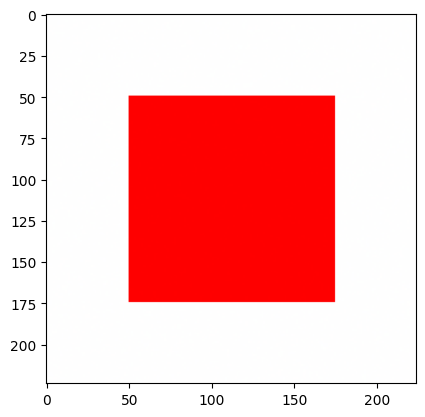

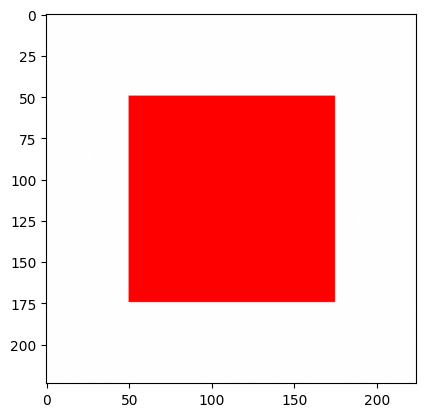

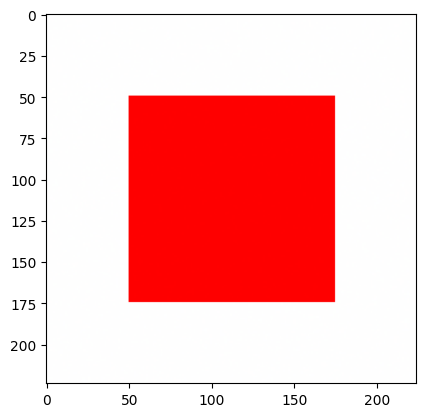

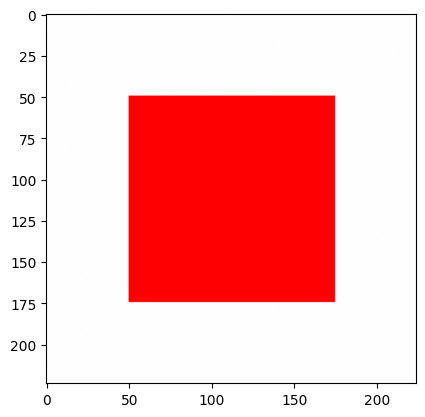

<Figure size 640x480 with 0 Axes>

In [8]:
def add_random_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape)
    return image+noise

datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

image = load_img('model.png')
x = img_to_array(image)
x = np.expand_dims(x, axis=0)
i = 0
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    plt.figure(i)
    plt.imshow(batch[0].astype('uint8'))
    plt.show()
    i=i+1
    if i%4==0:
        break
plt.tight_layout()

**Visualize augmented images**

Visualize the augmented images to understand the impact of each augmentation technique. 


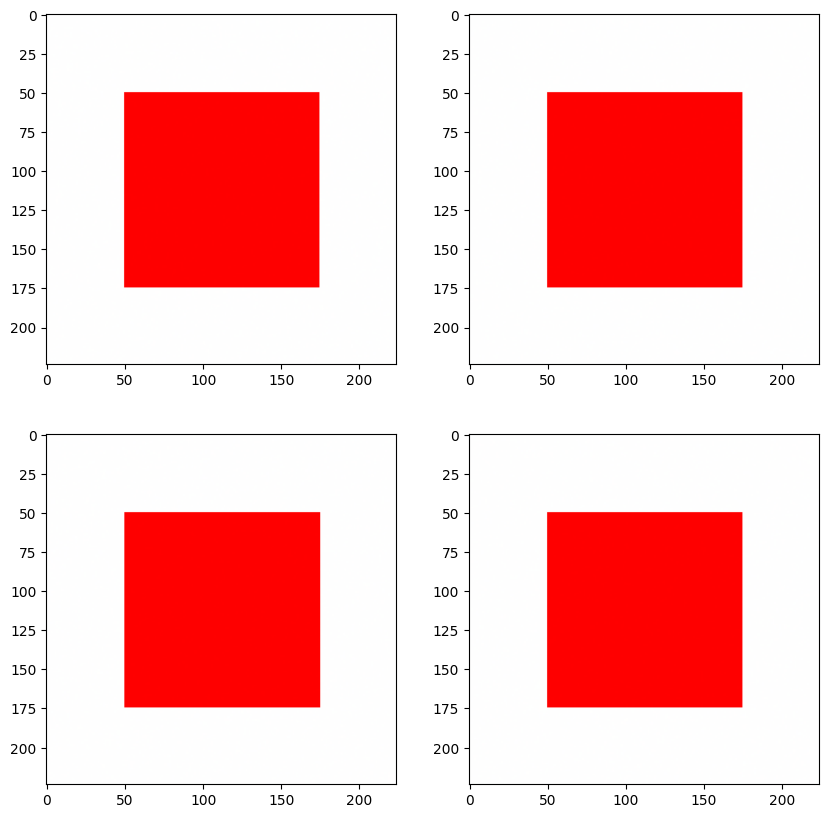

In [12]:
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i>=4:
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()

**Load image from following**
 
 !wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RgP3JFNtPTZA34UmG3KZaA/sample-images.zip

In [28]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RgP3JFNtPTZA34UmG3KZaA/sample-images.zip"
import urllib.request
import zipfile
import os

In [27]:
zip_path = 'training_images.zip'
image = urllib.request.urlretrieve(url, 'training_images.zip')
with zipfile.ZipFile(image[0], 'r') as zipref:
    zipref.extractall()

In [39]:
image_folder = 'sample_images'
image_paths = []
for img in os.listdir(image_folder):
    img_ = os.path.join(image_folder, img)
    image_paths.append(img_)
image_paths

['sample_images/training_images3.jpg',
 'sample_images/training_images2.jpg',
 'sample_images/training_images1.jpg']

In [59]:
training_images = []
for image_path in image_paths:
    img = load_img(image_path, target_size=(224, 224))
    img_ = img_to_array(img)
    training_images.append(img_)
training_images = np.array(training_images)
training_images.shape

(3, 224, 224, 3)

**Applying normal augmentation method**

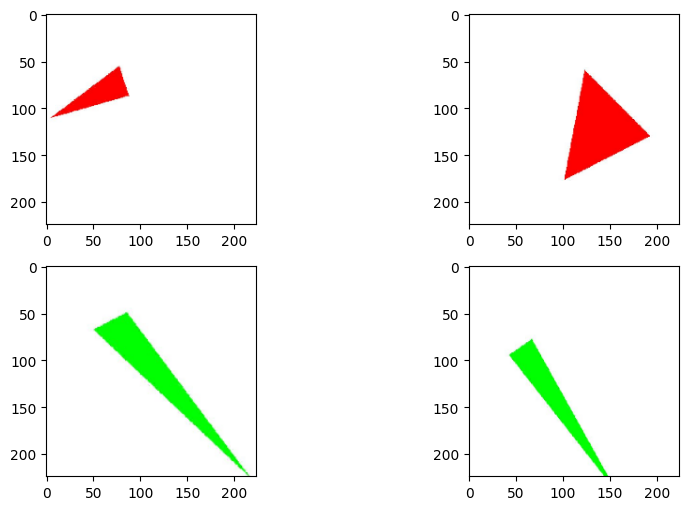

In [65]:
datagen = ImageDataGenerator(height_shift_range=0.2, 
                             zoom_range=0.4, 
                             width_shift_range=0.2, 
                             shear_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

plt.figure(figsize=(10, 6))
for i, batch in enumerate(datagen.flow(training_images, batch_size=1)):
    if i>=4:
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(array_to_img(batch[0]))
plt.show()

**Using Featurewise augmentation**

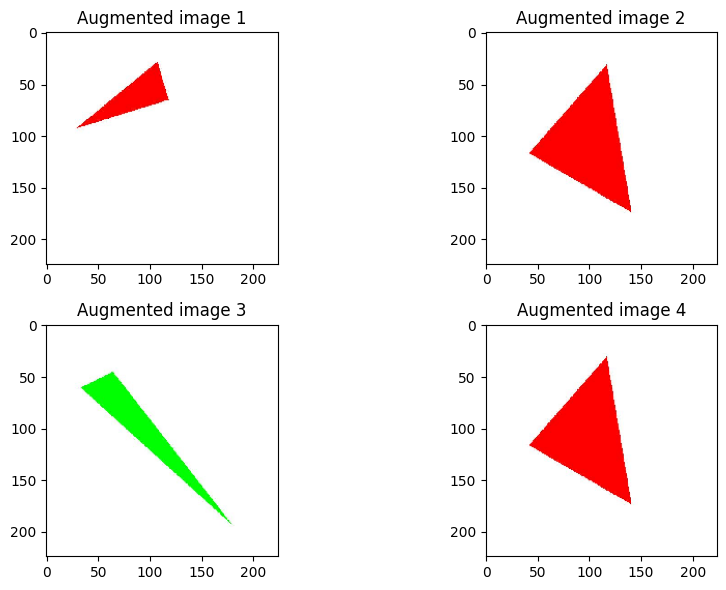

In [70]:
datagen = ImageDataGenerator(samplewise_center=True, 
                             samplewise_std_normalization=True, 
                             featurewise_center=True, 
                             featurewise_std_normalization=True)

plt.figure(figsize=(10, 6))
for i, batch in enumerate(datagen.flow(training_images, batch_size=1)):
    if i>=4:
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(array_to_img(batch[0]))
    plt.title(f'Augmented image {i+1}')
plt.tight_layout()
plt.show()

**Custom augmentation**

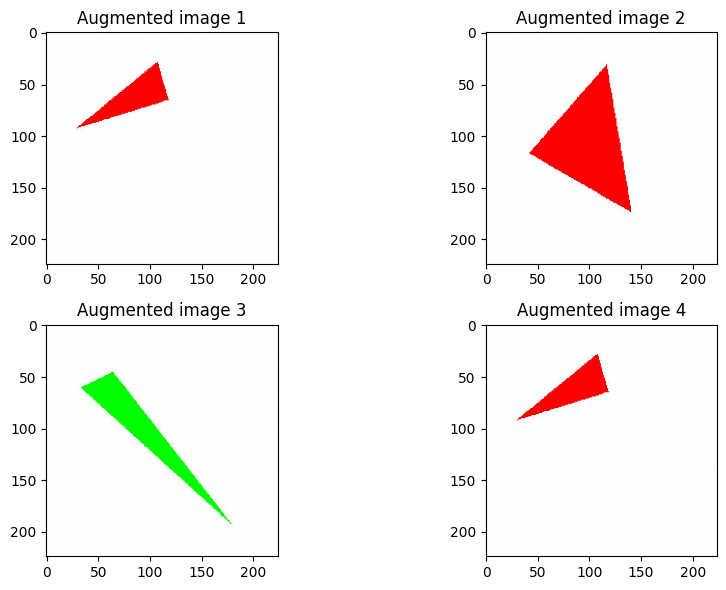

In [71]:
def add_random_noise(image):
    noise = np.random.normal(loc=0, scale=0.1, size=image.shape)
    return image+noise
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)
plt.figure(figsize=(10, 6))
for i, batch in enumerate(datagen.flow(training_images, batch_size=1)):
    if i>=4:
        break
    plt.subplot(2,2,i+1)
    plt.imshow(array_to_img(batch[0].astype('uint8')))
    plt.title(f'Augmented image {i+1}')
plt.tight_layout()
plt.show()